In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier


In [ ]:
IMG_HEIGHT=48
IMG_WIDTH=48
batch_size=32

In [ ]:
 

from google.colab import drive
drive.mount('/content/drive')
 


Mounted at /content/drive


In [ ]:
import os
train_image_files_path = "/content/drive/MyDrive/dataset/dataset/train/"
test_image_files_path = "/content/drive/MyDrive/dataset/dataset/test/"
valid_image_files_path = "/content/drive/MyDrive/dataset/dataset/validation/"


In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 30,
    shear_range = 0.3,
    zoom_range = 0.3,
    horizontal_flip = True,
    fill_mode ='nearest')

validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_image_files_path,
    color_mode ='grayscale',
    target_size =(IMG_HEIGHT, IMG_WIDTH),
    batch_size = batch_size,
    class_mode = 'categorical',
    shuffle = True)

validation_generator = validation_datagen.flow_from_directory(
    test_image_files_path,
    color_mode ='grayscale',
    target_size =(IMG_HEIGHT, IMG_WIDTH),
    batch_size = batch_size,
    class_mode = 'categorical',
    shuffle = True)


Found 1510 images belonging to 7 classes.
Found 1411 images belonging to 7 classes.


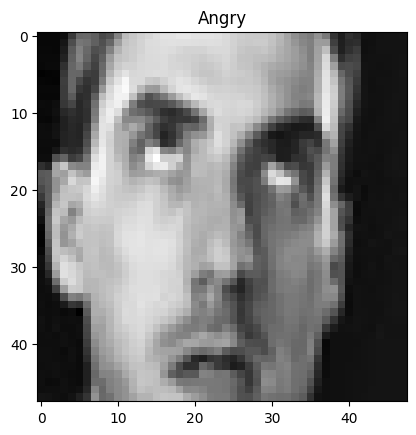

In [ ]:
class_labels =['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Surprise']

img, label = train_generator.__next__()

import random

i=random.randint(0, (img.shape[0])-1)
image = img[i]
labl = class_labels[label[i].argmax()]
plt.imshow(image[:,:,0], cmap='gray')
plt.title(labl)
plt.show()

In [ ]:
#crate the model

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1)) # lớp dropout này ngăn chặn overfitting

model.add(Flatten())
model.add(Dense(512, activation= 'relu')) # lớp kết nối đầy đủ với 512 đơn vị và hàm kích hoạt relu
model.add(Dropout(0.2)) # Lớp phẳng hóa để chuyển hóa đầu vào từ mảng 2 chìu thành mảng 1 chìu

model.add(Dense(7, activation= 'softmax')) 
# lớp kết nối đầy đủ cuối cùng với 7 đơn vị( tương ứng với số lớp cần phân loại) và hàm kích hoạt softmax


model.compile(optimizer = 'adam', loss ='categorical_crossentropy', metrics=['accuracy'] )
# định nghĩa hàm mất mát và phương thức tối ưu hóa cho mô hình

train_path = "/content/drive/MyDrive/dataset/dataset/train/"
test_path =  "/content/drive/MyDrive/dataset/dataset/test/"

num_train_imgs = 0 # số lượng ảnh có sẵn
for root, dirs, files in os.walk(train_path):
    num_train_imgs += len(files)

num_test_imgs = 0   
for root, dirs, files in os.walk(test_path):
    num_test_imgs += len(files)



In [ ]:
epochs = 50

history = model.fit(train_generator,
                    steps_per_epoch=num_train_imgs//batch_size,
                    epochs=epochs,
                    validation_data=validation_generator,
                    validation_steps=num_test_imgs//batch_size)

model.save('emotion_dectection_model_100epochs.h5')



Epoch 1/50
47/47 [==============================] - 589s 13s/step - loss: 1.9556 - accuracy: 0.1218 - val_loss: 1.9471 - val_accuracy: 0.1477
Epoch 2/50
47/47 [==============================] - 22s 468ms/step - loss: 1.9466 - accuracy: 0.1360 - val_loss: 1.9458 - val_accuracy: 0.1463
Epoch 3/50
47/47 [==============================] - 22s 467ms/step - loss: 1.9461 - accuracy: 0.1441 - val_loss: 1.9457 - val_accuracy: 0.1470
Epoch 4/50
47/47 [==============================] - 22s 474ms/step - loss: 1.9462 - accuracy: 0.1441 - val_loss: 1.9465 - val_accuracy: 0.1477
Epoch 5/50
47/47 [==============================] - 23s 481ms/step - loss: 1.9463 - accuracy: 0.1380 - val_loss: 1.9462 - val_accuracy: 0.1477
Epoch 6/50
47/47 [==============================] - 23s 484ms/step - loss: 1.9462 - accuracy: 0.1428 - val_loss: 1.9472 - val_accuracy: 0.0788
Epoch 7/50
47/47 [==============================] - 22s 480ms/step - loss: 1.9475 - accuracy: 0.1272 - val_loss: 1.9454 - val_accuracy: 0.1456


In [ ]:

from google.colab import files

uploaded = files.upload()

label = np.array(class_labels)

for fn in uploaded.keys():
  #predicting images
  path='/content/'+fn
  #In anh doc duoc
  plt.imshow(mpimg.imread(path))

  img=Image.open(path).resize((48,48))
  x=np.array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  y_predict = model.predict(images,batch_size=5)
  print(y_predict)
  print('Gia tri du doan la :', label[np.argmax(y_predict)])


In [ ]:
!pip install Pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#KNN

X_train = train_generator[0][0]
y_train = train_generator[0][1]
X_val = validation_generator[0][0]
y_val = validation_generator[0][1]

X_train = X_train.reshape(X_train.shape[0], -1)
X_val = X_val.reshape(X_val.shape[0], -1)
X_train = X_train / 255.0
X_val = X_val / 255.0

from sklearn.neighbors import KNeighborsClassifier

k = 5  # Số láng giềng K
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_val)
accuracy = np.mean(y_pred == y_val)
print("Accuracy:", accuracy)

from sklearn.metrics import precision_score

precision = precision_score(y_val, y_pred, average='macro'),
print("Precision:", precision)
recall = recall_score(y_val, y_pred, average='macro'),
print("recall:", recall)
f1= f1_score(y_val, y_pred, average='macro'),
print("f1:", f1)

Accuracy: 0.8526785714285714
Precision: (0.14285714285714285,)
recall: (0.02040816326530612,)
f1: (0.03571428571428571,)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

tree = DecisionTreeClassifier(criterion="gini", random_state=42, max_depth=3, min_samples_leaf=5)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_val)
accuracy = np.mean(y_pred == y_val)
print("Accuracy:", accuracy)

precision = precision_score(y_val, y_pred, average='macro')
print("Precision:", precision)

recall = recall_score(y_val, y_pred, average='macro')
print("Recall:", recall)

f1 = f1_score(y_val, y_pred, average='macro')
print("F1-score:", f1)


Accuracy: 0.8080357142857143
Precision: 0.13095238095238096
Recall: 0.1768707482993197
F1-score: 0.14285714285714285


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
